In [3]:
#import files
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
#read from csv file 
df = pd.read_csv('LiverDisorder.csv')

# 345 examples; 6 features ; binary class
# show all data, examples and labels
df.head()

,v1,v2,v3,v4,v5,v6,class
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,0
2,86,54,33,16,54,0.0,0
3,91,78,34,24,36,0.0,0
4,87,70,12,28,10,0.0,0


In [5]:
X = df.values[:, 0:6]
y = df.values[:, 6]

In [6]:
len(df)

345

In [7]:
print(sorted(Counter(y).items()))

[(0.0, 200), (1.0, 145)]


In [8]:
X

array([[ 85.,  92.,  45.,  27.,  31.,   0.],
       [ 85.,  64.,  59.,  32.,  23.,   0.],
       [ 86.,  54.,  33.,  16.,  54.,   0.],
       ..., 
       [ 98.,  77.,  55.,  35.,  89.,  15.],
       [ 91.,  68.,  27.,  26.,  14.,  16.],
       [ 98.,  99.,  57.,  45.,  65.,  20.]])

In [9]:
y

array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0

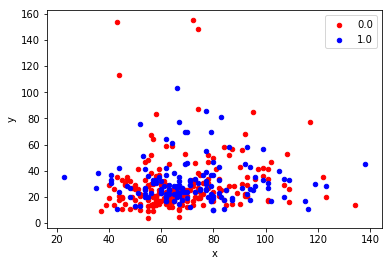

In [15]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,1], y=X[:,2], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [20]:
# NearMiss
#implements 3 different types of heuristic which can be selected with the parameter version
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=2)
X_res, y_res = nm1.fit_resample(X, y)


In [24]:
# number of examples after applying the algorithm
# from 345 to 290 
len(X_res)

290

In [25]:
# of examples for each class
# majority decreased from 200 to 145
print(sorted(Counter(y_res).items()))

[(0.0, 145), (1.0, 145)]


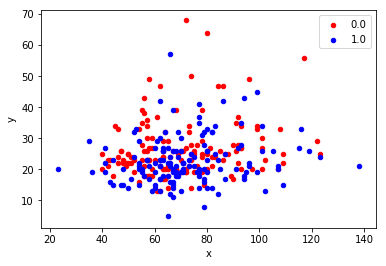

In [23]:
#visualize the data after oversampling is done
dt = DataFrame(dict(x=X_res[:,1], y=X_res[:,3], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()